In [1]:
# import dependencies
import pandas as pd
import numpy as np
import random
import requests
from api_keys import api_key
from citipy import citipy
import pprint
import matplotlib.pyplot as plt

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## List of Cities (from randomly generated latitudes and longitudes)

In [2]:
# Create a set of random lat and lng combinations
# use citipy to identify the city,country that matches the provided coordinates

lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)

lat_lng = list(zip(lats, lngs))

cities = []
countries = []

for coordinate in lat_lng:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    code = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    if city not in cities:
        cities.append(city)
        countries.append(code)

city_country = list(zip(cities, countries))

#len(city_country)

622

## Perform API Calls (for each city)

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"

unit = "imperial" 

query_url = f"{url}appid={api_key}&units={unit}&q="



In [4]:
print ("Beginning data retrieval...")
print ("----------------------------")

# establish lists to store the specified data for each city from the api
found_cities = []
found_countries = []
found_lats = []
found_lngs = []
date = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

count = 0

for place in city_country:
    
    query = place[0].replace(" ", "+") + "," + place[1].replace(" ", "+")
    
    city_data = requests.get(query_url + query).json()
    
    if city_data["cod"] == "404":
        print(place[0] + " was not found...skippping")
    

    else:
        count += 1
        print (str(count) + ". Processing data for " + place[0]) # print log of each city that was found and is being processed
        #print (query_url + query)
        found_cities.append(place[0])
        found_countries.append(place[1])
        date.append(city_data["dt"])
        cloudiness.append(city_data["clouds"]["all"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        wind_speed.append(city_data["wind"]["speed"])
        found_lats.append(city_data["coord"]["lat"])
        found_lngs.append(city_data["coord"]["lon"])

Beginning data retrieval...
----------------------------
1. Processing data for bluff
2. Processing data for vuktyl
3. Processing data for narsaq
4. Processing data for alugan
5. Processing data for ushuaia
mataura was not found...skippping
6. Processing data for bredasdorp
gat was not found...skippping
7. Processing data for punta arenas
8. Processing data for vaini
9. Processing data for erzin
10. Processing data for rikitea
11. Processing data for nikolskoye
codrington was not found...skippping
12. Processing data for hermanus
13. Processing data for neepawa
14. Processing data for kapaa
15. Processing data for pacific grove
16. Processing data for whitehorse
taolanaro was not found...skippping
17. Processing data for francistown
18. Processing data for cidreira
19. Processing data for port elizabeth
20. Processing data for thompson
21. Processing data for nishihara
22. Processing data for cape town
saleaula was not found...skippping
23. Processing data for kahului
24. Processing da

207. Processing data for port hueneme
208. Processing data for olmos
malwan was not found...skippping
209. Processing data for tucurui
210. Processing data for strezhevoy
211. Processing data for vangaindrano
212. Processing data for atar
213. Processing data for baykit
214. Processing data for dongsheng
215. Processing data for labuhan
bolungarvik was not found...skippping
216. Processing data for wanaka
217. Processing data for carupano
vaitupu was not found...skippping
218. Processing data for schroeder
219. Processing data for teguise
220. Processing data for rudnogorsk
palabuhanratu was not found...skippping
221. Processing data for viedma
222. Processing data for yulara
223. Processing data for kenora
224. Processing data for inongo
225. Processing data for nabire
226. Processing data for dikson
227. Processing data for mahebourg
228. Processing data for knysna
229. Processing data for mantua
230. Processing data for caboolture
231. Processing data for hakkari
232. Processing dat

409. Processing data for longonjo
410. Processing data for oranjestad
411. Processing data for vila franca do campo
412. Processing data for comodoro rivadavia
413. Processing data for treinta y tres
414. Processing data for tamsweg
415. Processing data for bambous virieux
416. Processing data for fallon
417. Processing data for souillac
418. Processing data for leverano
nguiu was not found...skippping
419. Processing data for sorland
anklesvar was not found...skippping
420. Processing data for nouadhibou
achisay was not found...skippping
421. Processing data for woensdrecht
422. Processing data for sept-iles
423. Processing data for chiang kham
424. Processing data for manokwari
425. Processing data for tonk
426. Processing data for cayenne
427. Processing data for aswan
428. Processing data for shilovo
429. Processing data for entre rios
430. Processing data for semirom
431. Processing data for noumea
432. Processing data for morales
envira was not found...skippping
433. Processing d

## DataFrame of each city's weather data

In [10]:
# create dataframe using data from api
weather_df = pd.DataFrame({"City" : found_cities, "Country" : found_countries, "Date" : date,
                   "Lat" : found_lats, "Lng" : found_lngs, "Max Temp": max_temp, "Humidity" : humidity, 
                   "Cloudiness" : cloudiness, "Wind Speed" : wind_speed})

weather_df.to_csv("../Output/city_weather.csv") # write data frame to csv file and save

weather_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,bluff,nz,1561250944,-46.60,168.33,48.00,85,47,4.00
1,vuktyl,ru,1561250944,63.86,57.31,46.93,93,95,2.91
2,narsaq,gl,1561250944,60.91,-46.05,48.20,66,96,12.75
3,alugan,ph,1561250945,12.22,125.48,86.17,65,52,0.92
4,ushuaia,ar,1561250919,-54.81,-68.31,32.00,92,20,5.82


## Temperature v Latitude

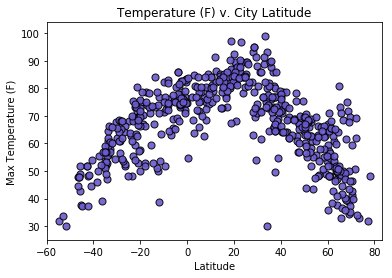

In [84]:
# create scatter plot of the relationship between temperature and latitude
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 50);

plt.title("Temperature (F) v. City Latitude");
plt.ylabel("Max Temperature (F)");
plt.xlabel("Latitude");

plt.ylim(weather_df["Max Temp"].min() - 5, weather_df["Max Temp"].max() + 5)
plt.xlim(weather_df["Lat"].min() - 5, weather_df["Lat"].max() + 5)
         
plt.savefig("../Images/temp_lat.png")

## Humidity v Latitude

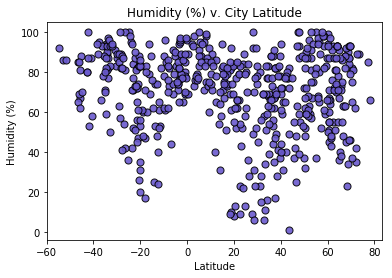

In [83]:
# create scatter plot of the relationship between humidity and latitude
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 50);


plt.title("Humidity (%) v. City Latitude");
plt.ylabel("Humidity (%)");
plt.xlabel("Latitude");

plt.ylim(weather_df["Humidity"].min() - 5, weather_df["Humidity"].max() + 5)
plt.xlim(weather_df["Lat"].min() - 5, weather_df["Lat"].max() + 5)

plt.savefig("../Images/humidity_lat.png")


## Cloudiness v Latitude

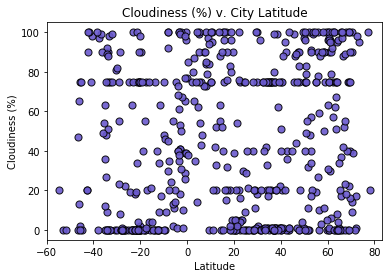

In [82]:
# create scatter plot of the relationship between cloudiness and latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 50);


plt.title("Cloudiness (%) v. City Latitude");
plt.ylabel("Cloudiness (%)");
plt.xlabel("Latitude");


plt.ylim(weather_df["Cloudiness"].min() - 5, weather_df["Cloudiness"].max() + 5)
plt.xlim(weather_df["Lat"].min() - 5, weather_df["Lat"].max() + 5)

plt.savefig("../Images/clouds_lat.png")

## Wind Speed v Latitude

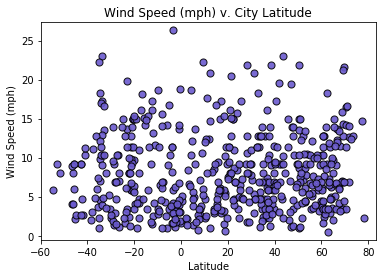

In [81]:
# create scatter plot of the relationship between wind speed and latitude
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 50);


plt.title("Wind Speed (mph) v. City Latitude");
plt.ylabel("Wind Speed (mph)");
plt.xlabel("Latitude");

plt.ylim(weather_df["Wind Speed"].min() - 1, weather_df["Wind Speed"].max() + 1)
plt.xlim(weather_df["Lat"].min() - 5, weather_df["Lat"].max() + 5)

plt.savefig("../Images/wind_lat.png")